In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet 

In [2]:
df = pd.read_csv('DailyDelhiClimateTrain.csv')

In [3]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
df.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [5]:
df.shape

(1462, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


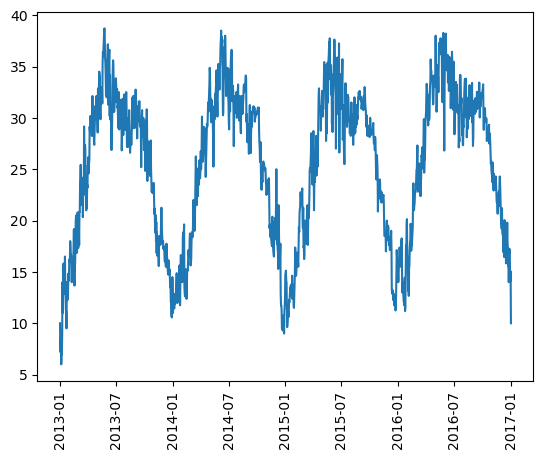

In [9]:
plt.plot(df.iloc[:,0],df.iloc[:,1])
plt.xticks(rotation=90)
plt.show()

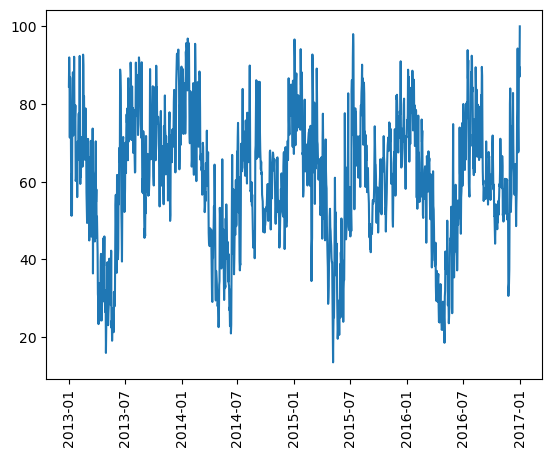

In [10]:
plt.plot(df.iloc[:,0],df.iloc[:,2])
plt.xticks(rotation=90)
plt.show()

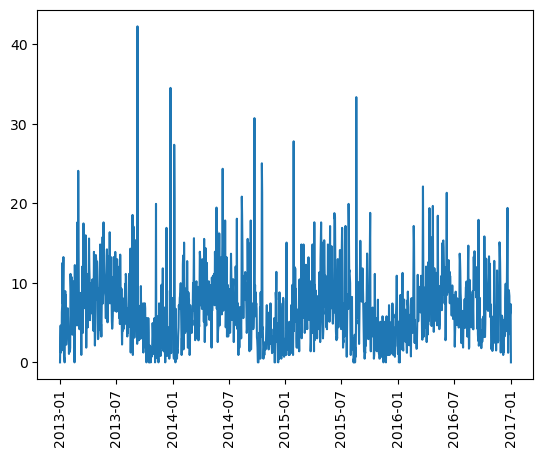

In [11]:
plt.plot(df.iloc[:,0],df.iloc[:,3])
plt.xticks(rotation=90)
plt.show()

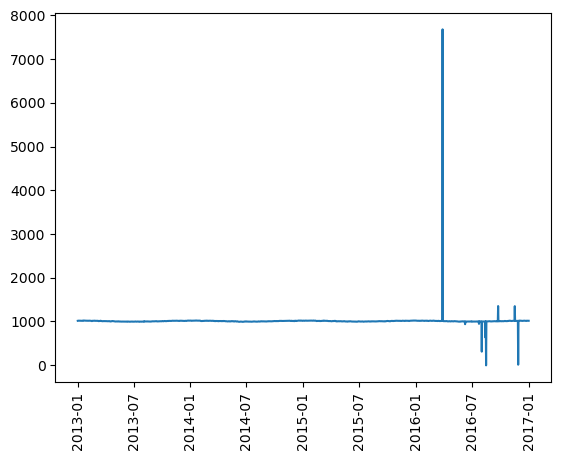

In [12]:
plt.plot(df.iloc[:,0],df.iloc[:,4])
plt.xticks(rotation=90)
plt.show()

In [13]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df_temp = df.iloc[:,0:2]

In [16]:
df_temp.head()

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


In [17]:
df_humid = df[['date','humidity']]
df_wind = df[['date','wind_speed']]
df_press = df[['date','meanpressure']]

In [18]:
df_press

,date,meanpressure
0,2013-01-01,1015.666667
1,2013-01-02,1017.800000
2,2013-01-03,1018.666667
3,2013-01-04,1017.166667
4,2013-01-05,1016.500000
...,...,...
1457,2016-12-28,1015.565217
1458,2016-12-29,1016.904762
1459,2016-12-30,1017.904762
1460,2016-12-31,1016.100000


In [19]:
df_wind

,date,wind_speed
0,2013-01-01,0.000000
1,2013-01-02,2.980000
2,2013-01-03,4.633333
3,2013-01-04,1.233333
4,2013-01-05,3.700000
...,...,...
1457,2016-12-28,3.547826
1458,2016-12-29,6.000000
1459,2016-12-30,6.266667
1460,2016-12-31,7.325000


In [20]:
df_humid

,date,humidity
0,2013-01-01,84.500000
1,2013-01-02,92.000000
2,2013-01-03,87.000000
3,2013-01-04,71.333333
4,2013-01-05,86.833333
...,...,...
1457,2016-12-28,68.043478
1458,2016-12-29,87.857143
1459,2016-12-30,89.666667
1460,2016-12-31,87.000000


In [21]:
df_temp.columns=['ds','y']

In [22]:
df_temp.head()

,ds,y
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


In [23]:
prop = Prophet()
prop.fit(df_temp)

15:03:25 - cmdstanpy - INFO - Chain [1] start processing
15:03:25 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
future = prop.make_future_dataframe(periods=365)
future.tail()

,ds
1822,2017-12-28
1823,2017-12-29
1824,2017-12-30
1825,2017-12-31
1826,2018-01-01


In [25]:
forecast = prop.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1822,2017-12-28,15.935849,13.121548,18.724648
1823,2017-12-29,15.840498,13.183222,18.713905
1824,2017-12-30,15.709965,13.017271,18.506317
1825,2017-12-31,15.570799,13.084210,18.158300
1826,2018-01-01,15.761243,13.226758,18.503880


In [26]:
df_temp.tail()

,ds,y
1457,2016-12-28,17.217391
1458,2016-12-29,15.238095
1459,2016-12-30,14.095238
1460,2016-12-31,15.052632
1461,2017-01-01,10.000000


In [27]:
future = prop.make_future_dataframe(periods=365*2)
future.tail()

,ds
2187,2018-12-28
2188,2018-12-29
2189,2018-12-30
2190,2018-12-31
2191,2019-01-01


In [28]:
forecast = prop.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2187,2018-12-28,17.089798,14.339147,19.919750
2188,2018-12-29,16.931797,14.144259,19.883679
2189,2018-12-30,16.766622,13.472285,19.773253
2190,2018-12-31,16.932836,13.768274,19.703157
2191,2019-01-01,16.979226,13.764516,19.711068


In [29]:
future = prop.make_future_dataframe(periods=365*5)
future.tail()

,ds
3282,2021-12-27
3283,2021-12-28
3284,2021-12-29
3285,2021-12-30
3286,2021-12-31


In [30]:
forecast = prop.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3282,2021-12-27,20.641048,14.288427,26.964703
3283,2021-12-28,20.607633,14.091499,26.924202
3284,2021-12-29,20.664130,14.105027,26.621034
3285,2021-12-30,20.551146,13.740536,26.553693
3286,2021-12-31,20.498294,14.116393,26.886347


In [31]:
forecast['yhat'].mean()

28.287415515521708